<a href="https://colab.research.google.com/github/antonno5/python_lab1/blob/master/Copy_of_lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 30% баллов**, т.е. за задание 1 нужно получить минимум 3 балла, за задание 2 - минимум 6 баллов и задание 3 - минимум 9 баллов.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
URL = 'https://api.hh.ru/vacancies'

prof = ['Охранник', 'Танцор', 'Гитарист', 'Диджей', 'Бармен']
data = list()

for p in prof:
  params = {'text' : p, 'area' : 1}
  data.append(requests.get(URL, params).json())

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
vac = list(d['found'] for d in data)
count = 0
for i in vac:
  count += i
count

1745

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, x, y):
      self.name = name
      self.x = x
      self.y = y

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = list()
for d in data:
  for v in d['items']:
    if v['address'] != None:
      companies.append(Company(v['employer']['name'], v['address']['lat'], v['address']['lng']))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
count = 0
for d in data:
  for v in d['items']:
    if v['address'] != None:
      count += 1
count

51

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
def dist(a, b):
  return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**(1/2)

def in_mkad(company):
  gum = (55.75474,37.621408)
  dom = (55.811184, 37.828272)
  return company.x != None and company.y != None and dist((company.x, company.y), gum) <= dist(dom, gum)

mkad = list(filter(in_mkad, companies))

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

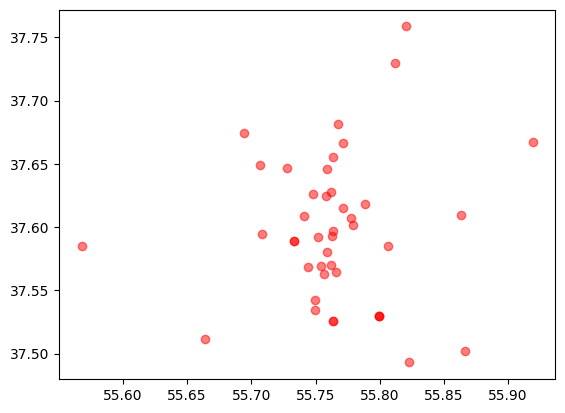

In [ ]:
x = list()
y = list()
name = list()
for i in mkad:
  x.append(i.x)
  y.append(i.y)
  name.append(i.name)
plt.plot(x, y, 'ro', alpha=0.5)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
arr = pd.DataFrame({"lat" : x, "lon" : y, "name" : name})
fig = px.scatter_mapbox(arr, lat="lat", lon="lon", hover_name="name", zoom=9, height=500, width=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:** 

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Можно заметить, что большинство диджеев, танцоров, барменов, охранников, гитаристов требуются в центральном районе Москвы. Это, скорее всего связано, с тем, что большинство развлекательных организаций расположены около центра.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 154MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
diamonds.count()[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
print(max(diamonds['total_sales_price']))
print(min(diamonds['total_sales_price']))

1449881
200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
count = 0
for v in diamonds.values:
  for z in v:
    if z == 'None' or z == 'unknown':
      count += 1

count

1891168

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
cols = list()

for col in diamonds.items():
  for z in diamonds[col[0]]:
    if z == 'None' or z == 'unknown':
      cols.append(col[0])
      break

cols

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
count = 0

cols_arr = list()

for col in cols:
  if col.startswith('fancy_color_') or col.startswith('fluor_'):
    count += 1
    cols_arr.append(col)

count

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
count = 0

for col in cols_arr:
  for i in diamonds[col]:
    if i != 'None' and i != 'unknown':
      count += 1

count

111586

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(columns = cols_arr,axis = 1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
cols = list()

for col in diamonds.items():
  if col[0].startswith('culet_'):
    cols.append(col[0])

diamonds.drop(columns = cols,axis = 1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
sum = 0
for i in diamonds['total_sales_price']:
  sum += i
sum

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
diamonds[['cut', 'lab']]

,cut,lab
0,Round,IGI
1,Round,IGI
2,Round,IGI
3,Round,IGI
4,Round,IGI
...,...,...
219698,Round,GIA
219699,Radiant,GIA
219700,Round,GIA
219701,Princess,GIA


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
col = list(diamonds['total_sales_price'])
lenght = diamonds.count()[0]
for x in range(5):
  for y in range(5):
    tot = 0
    for a in range(lenght):
      tot += col[y] * a
    print(tot, end=' ')
  print()

4826918850600 4826918850600 4826918850600 4826918850600 4826918850600 
4826918850600 4826918850600 4826918850600 4826918850600 4826918850600 
4826918850600 4826918850600 4826918850600 4826918850600 4826918850600 
4826918850600 4826918850600 4826918850600 4826918850600 4826918850600 
4826918850600 4826918850600 4826918850600 4826918850600 4826918850600 


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

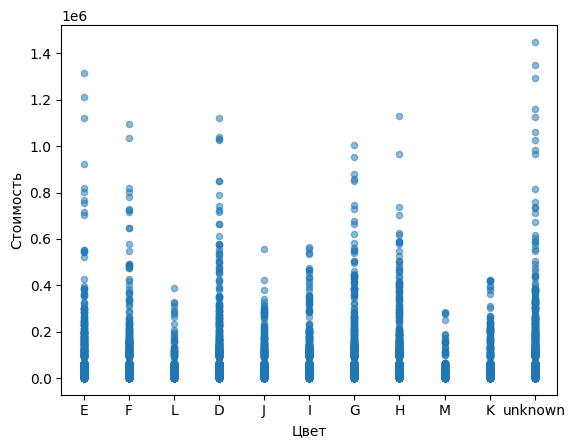

In [ ]:
color_price = diamonds[['color', 'total_sales_price']]
color_price_named = color_price.set_axis(['Цвет','Стоимость'], axis='columns')
graph = color_price_named.plot.scatter(x='Цвет', y='Стоимость', alpha=0.5)

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

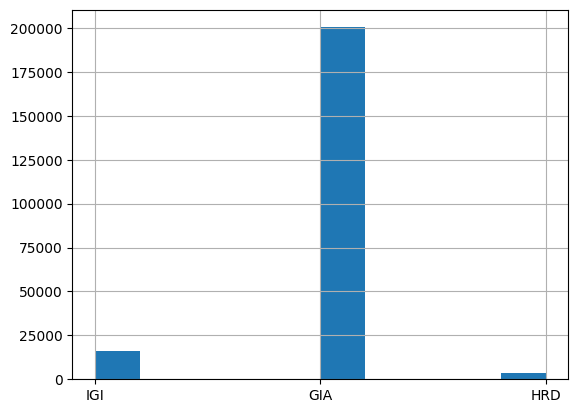

In [ ]:
table = diamonds['lab']
graph = table.hist()

(2 балла) Постройте график `вес бриллианта - стоимость`:

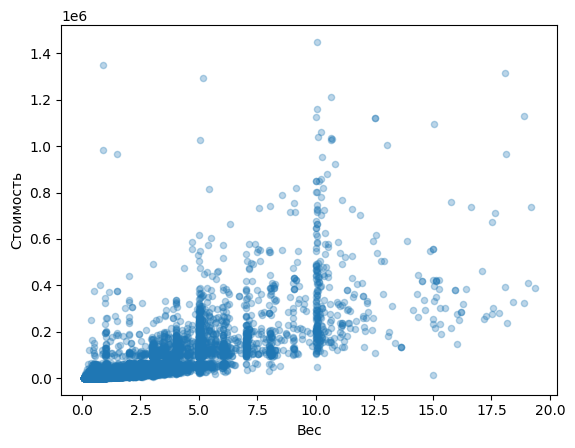

In [ ]:
weight_price = diamonds[['carat_weight', 'total_sales_price']]
weight_price_named = weight_price.set_axis(['Вес','Стоимость'], axis='columns')
graph = weight_price_named.plot.scatter(x='Вес', y='Стоимость', alpha=0.3)

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

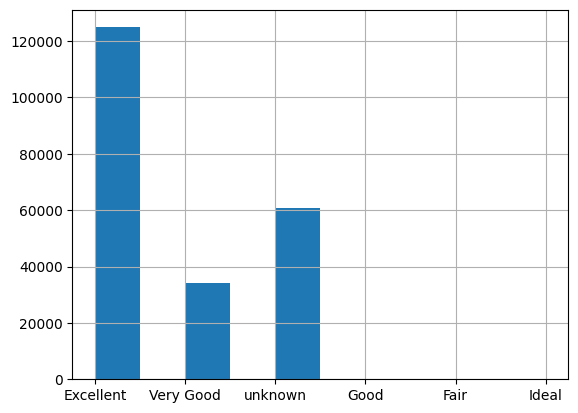

In [ ]:
table = diamonds['cut_quality']
graph = table.hist()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Большинство бриллиантов имеются огранку Excellent, стоимость бриллианта зависит от веса, но также зависит и от других параметров. Большинстов бриллиантов оцениваются в лаборатории GIA. Максимальная стоимость бриллианта зависит от типа его огранки.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [ ]:
ds = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]

(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [ ]:
ds = ds.sample(frac=1).reset_index(drop=True)
ds

,meas_length,meas_width,meas_depth,total_sales_price
0,5.69,5.72,3.55,4052
1,15.62,7.32,4.64,48759
2,5.65,5.70,3.56,3048
3,5.46,4.14,2.61,1120
4,5.10,5.12,3.18,1140
...,...,...,...,...
219698,0.00,0.00,0.00,624
219699,4.20,4.24,2.65,1022
219700,4.20,4.24,2.68,904
219701,4.74,4.41,3.05,3078


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
sum_min = list()
for i in range(ds.count()[0]):
  len = ds['meas_length'][i]
  wid = ds['meas_width'][i]
  deep = ds['meas_depth'][i]
  mink = (abs(len - wid) ** 3 + abs(wid - deep) ** 3 + abs(deep - len) ** 3) ** (1/3)
  sum_min.append(mink)
ds['sum_mink'] = sum_min

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [ ]:
df = ds[['sum_mink', 'total_sales_price']]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
test = df.iloc [:df.count()[0]//5]
tren = df.iloc [df.count()[0]//5:]

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

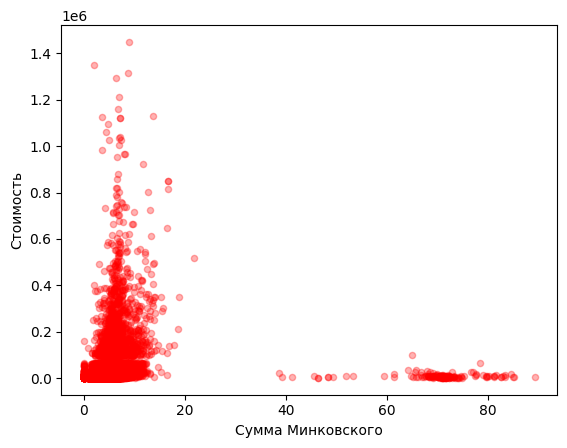

In [ ]:
tren_named = tren.set_axis(['Сумма Минковского','Стоимость'], axis='columns')
graph = tren_named.plot.scatter(x='Сумма Минковского', y='Стоимость', alpha=0.3, color='red')

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

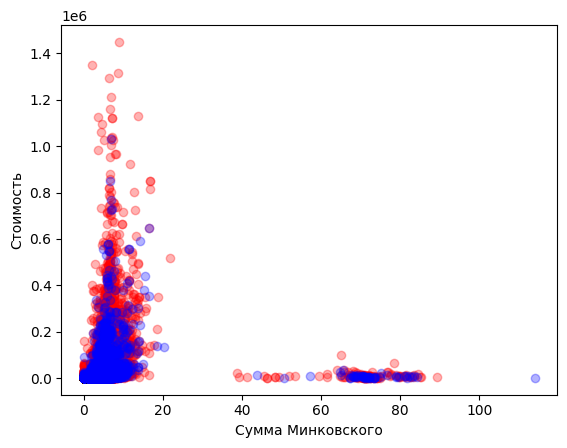

In [ ]:
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.scatter(x=tren['sum_mink'],y=tren['total_sales_price'],c='red',alpha=0.3)
plt.scatter(x=test['sum_mink'],y=test['total_sales_price'],c='blue',alpha=0.3)

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(test)

distances, indices = nbrs.kneighbors(tren)

distances

array([[0.02547431],
       [0.71792353],
       [0.84195938],
       ...,
       [0.00615258],
       [0.08801221],
       [0.04417805]])

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
diff_arr = list()

for i in range(test.count()[0]):
  diff_arr.append(distances[i][0] / test['total_sales_price'][i] * 100)

sum = 0
for i in diff_arr:
  sum += i

print(sum / test.count()[0])

1.3696197367746266


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
ds = diamonds[['cut', 'lab']]

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(ds)

ds = enc.transform(ds).toarray()

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds, list(diamonds['total_sales_price']), train_size=0.75)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

707067000.0004369

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Судя по ошибке не существует чёткой зависимости между категориальными признаками и ценой бриллианта. Готовые инструменты достаточно быстро и эффективно обрабатывают данные, при этом очень просты в использовании. Написанный мной код гораздо медленнее, чем готовые инструменты.